<h1 align='center'>  Árbol de Decisión </h1> 

Los árboles de decisión trabajan de manera descendente y la división de nodos es un concepto importante para cualquier algoritmo de árboles de decisión. La mayoría de los algorítmos tienen un enfoque codicioso a la hora de dividir el espacio de entrada en subconjuntos.

El proceso más básico en términos simples es probar y dividir los datos usando diferentes atributos y funciones de costo. En cada paso se selecciona la división que ressulta menos costosa. Los problemas de clasificación y regresión utilizan diferentes funciones de costos. Algunas de estas se mencionan a continuación:

* **Error Cuadrático Medio**: Es usada principalmente para árboles de regresión, esta calcula el cuadrado de las diferencias entre el valor observado y predicho.

* **Error Absoluto Medio**: Es usada para árboles de regresión, es similar al error cuadrático medio, solo que usa la diferencia en valor absoluto. 

* **Reducción de Varianza**:  Este fue el primero que se introdujo con el algoritmo CART. Se usa la fórmula estándar de la varianza y se selecciona aquel resultado que minimiza la varianza.

* **Impureza de Gini**: Es usado principalmente en clasificación, esta medida viene dada por:
 $$\displaystyle\mbox{Gini(t)} = 1-\sum_{i=0}^{c-1}[p(i/t)]^2$$


* **Ganancia de información**: Es utilizado en árboles de clasificación, en este caso la partición busca aumentar la pureza respecto al nodo padre. Los criterios usado para medir la impureza son los siguientes:

* $\displaystyle\mbox{Entropia(t)} = -\sum_{i=0}^{c-1}p(i/t)log_{2}(p(i/t))$

* $\displaystyle\mbox{Gini(t)} = 1-\sum_{i=0}^{c-1}[p(i/t)]^2$

* $\displaystyle \mbox{Error de clasificacion(t)} = 1 - \max_{i}[p(i/t)]$

## Criterios para detener una partición

Existen diferentes criterios para evitar que un árbol crezca hasta alcanzar demasiada complejidad, algunos de estos criterios son:

* **Prepoda**: Consiste en definir un umbral para la Ganancia de Información y si, en un nodo determinado, ninguna de las particiones proporciona una ganancia mayor al umbral, se para el desarrollo de subárboles en dicho nodo. es facil de implementar, sin embargo tiene la desventaja que no se conoce a priori el umbral óptimo.

* **Poda**: Consiste en desarrollar el árbol completo hasta tener particiones completamente puras y a partir de allí comenzar a eliminar ramas del árbol usando algún criterio. Los dos criterios más utilizados son:
    * Reemplazar subárboles por hojas si estos no proporcionan una ganacia suficiente de información.
    * Reemplazar subárboles por árboles más simples.

**gini**

La impureza de gini se calcula utilizando la siguiente fórmula:

La impureza gini mide la frecuencia con la que cualquier elemento del conjunto de datos se etiquetará incorrectamente cuando se etiqueta al azar.

El valor mínimo del Índice Gini es 0. Esto sucede cuando el nodo es puro , esto significa que todos los elementos contenidos en el nodo son de una sola clase. Por lo tanto, este nodo no se dividirá nuevamente. Así, la división óptima es elegida por las características con menor índice de Gini. Además, obtiene el valor máximo cuando la probabilidad de las dos clases es la misma.

G i nim i n= 1 – (12) = 0
G i nimx _ _= 1 – (0.52+0.52) = 0,5

**entropía**

La entropía es una medida de información que indica el desorden de las características con el objetivo. Similar al Índice Gini, la división óptima es elegida por la característica con menos entropía. Obtiene su valor máximo cuando la probabilidad de las dos clases es la misma y un nodo es puro cuando la entropía tiene su valor mínimo, que es 0:

El Índice Gini y la Entropía tienen dos diferencias principales:

**El Índice Gini tiene valores dentro del intervalo [0, 0.5] mientras que el intervalo de la Entropía es [0, 1].**

<h2> Mapa </h2>
<ul>
    <li>1-. Formular la pregunta y determinar los datos requeridos</li>
    <li>2-. Adquirir los datos en un formato accesible</li>
    <li>3-. Identifique y corrija los puntos de datos faltantes/anomalías según sea necesario</li>
    <li>4-. Preparar los datos para el modelo de aprendizaje automático</li>
    <li>5-. Entrenar el modelo en los datos de entrenamiento</li>
    <li>6-. Predicciones sobre los datos de prueba</li>
    <li>7-. Comparar las predicciones con los objetivos conocidos del conjunto de pruebas y calcule las métricas de rendimiento</li>
    <li>8-. Reducción de caracteristicas, si el modelo no fue satisfactorio</li>
    <li>9-. Interpretación el modelo y reporte los resultados visual y numéricamente</li>
</ul>

# 2-. Adquisición de datos

Primero, necesitamos algunos datos. Para usar un ejemplo realista, recuperé datos de pacientes del Hospital Herminda Martin de Chillan. En general, aproximadamente el 80 % del tiempo dedicado al análisis de datos es limpiar y recuperar datos, pero esta carga de trabajo se puede reducir encontrando fuentes de datos de alta calidad.

In [173]:
# Libreria para la manipulación de los datos
import pandas as pd
import numpy as np

# Leer el dataframe
dataframe = pd.read_excel('../bdd/dataframe.xlsx')
dataframe.head(5)

,CLAVE,COMUNA,TELEFONOS,FICHA CLINICA,CTA CTE,EDAD,PESO,TALLA,HTA,DIABETES,...,logVEGF,logPlGF,logPCR,PCR/VEGF ratio,PCR/PLGF ratio,IL-6 (pg/ml),IL-6 corregida,log IL-6,IL-6/VEGF,IL-6/PlGF
0,1,san carlos,NaN,2012418042,11998898,53.0,NaN,NaN,NaN,NaN,...,1.768165,0.973961,0.170262,0.096293,0.174814,18.586835,0.156953,-0.804231,-0.454840,-0.825732
1,2,coihueco,41723921-74822219,2000149601,12002852,54.0,88.0,165.0,si,si,...,2.143150,1.749737,0.222716,0.103920,0.127286,1.263441,0.012818,-1.892186,-0.882899,-1.081411
2,3,chillan,71818219-50323843,98085992,12003092,78.0,NaN,NaN,si,si,...,1.560877,1.213371,1.083144,0.693933,0.892673,49.091862,0.436365,-0.360150,-0.230736,-0.296817
3,4,coihueco,77107584-93406930,9772094,11995391,87.0,52.5,NaN,si,si,...,2.254849,1.660278,0.060698,0.026919,0.036559,96.544126,0.934859,-0.029254,-0.012974,-0.017620
4,5,yungay,99240760-77884029,98095110,12014450,69.0,94.0,NaN,si,si,...,2.015323,1.741045,0.107210,0.053197,0.061578,43.309864,0.379102,-0.421244,-0.209021,-0.241949


In [174]:
print('Existen {} pacientes con {} variables.'.format(*dataframe.shape))

Existen 44 pacientes con 85 variables.


# 3-. Identifique y corrija los puntos de datos faltantes/anomalías según sea necesario

En este item, la base de datos será rellenada.

In [176]:
# Tomaremos las variables más significativas para la investigación
columnasMuestra = ['HTA', 'DIABETES', 'EDAD','TRIGLICERIDOS', 'PESO', 'TALLA', 'FC', 'GLUCOSA', 'Hb A/C  %', 'COL. TOTAL', 'TRIGLICERIDOS', 'LDL', 'HDL', 'HCTO', 'HB', 'VCM', 'HCM', 'VHS', 'PLAQUETAS', 'INR', 'CONTEO G.B.', 'P.C.R', 'Nitrogeno Ureico', 'Uremia', 'Creatinina', 'TTPA', 'TP', 'NA', 'K', 'CL', 'Fosfatasa Alcalina', 'Gamma glutamil', 'Transaminasa piruvica', 'Trans oxal', 'GLASGOW AL INICO ACV', 'NIHSS_INICO_ACV', 'RANKIN INICIO ACV', 'NIHSS alta ACV', 'RANKIN alta ACV', 'NIHSS 6M', 'RANKIN 6M']
dataset = dataframe[[*columnasMuestra]]

# Para los datos fallecidos y NaN realizamos la impuntación y manejo de datos a través del promedio
dataset['NIHSS 6M'] = dataset['NIHSS 6M'].replace( ['fallecido'], 0)
dataset['RANKIN 6M'] = dataset['RANKIN 6M'].replace( ['no'], 0)

valores_por_defecto = {'HTA': "DESCONOCIDO",
                       'DIABETES' : "DESCONOCIDO",
                       'EDAD':dataset["EDAD"].mean(),
                       'TRIGLICERIDOS':dataset["TRIGLICERIDOS"].mean(), 
                       'PESO':dataset["PESO"].mean(),
                       'TALLA':dataset["TALLA"].mean(),
                       'FC':dataset["FC"].mean(),
                       'GLUCOSA':dataset["GLUCOSA"].mean(),
                       'Hb A/C  %':dataset["Hb A/C  %"].mean(), 
                       'COL. TOTAL':dataset["COL. TOTAL"].mean(), 
                       'TRIGLICERIDOS':dataset["TRIGLICERIDOS"].mean(),
                       'LDL':dataset["LDL"].mean(), 
                       'HDL':dataset["HDL"].mean(),
                       'HCTO':dataset["HCTO"].mean(), 
                       'HB':dataset["HB"].mean(),
                       'VCM':dataset["VCM"].mean(),
                       'HCM':dataset["HCM"].mean(), 
                       'VHS':dataset["VHS"].mean(),
                       'PLAQUETAS':dataset["PLAQUETAS"].mean(),
                       'INR':dataset["INR"].mean(),
                       'CONTEO G.B.':dataset["CONTEO G.B."].mean(),
                       'P.C.R':dataset["P.C.R"].mean(),
                       'Nitrogeno Ureico':dataset["Nitrogeno Ureico"].mean(),
                       'Uremia':dataset["Uremia"].mean(),
                       'Creatinina':dataset["Creatinina"].mean(), 
                       'TTPA':dataset["TTPA"].mean(),
                       'TP':dataset["TP"].mean(), 
                       'NA':dataset["NA"].mean(), 
                       'K':dataset["K"].mean(),
                       'CL':dataset["CL"].mean(),
                       'Fosfatasa Alcalina':dataset["Fosfatasa Alcalina"].mean(),
                       'Gamma glutamil':dataset["Gamma glutamil"].mean(), 
                       'Transaminasa piruvica':dataset["Transaminasa piruvica"].mean(),
                       'Trans oxal':dataset["Trans oxal"].mean(), 
                       'GLASGOW AL INICO ACV':dataset["GLASGOW AL INICO ACV"].mean(),
                       'NIHSS_INICO_ACV':dataset["NIHSS_INICO_ACV"].mean().round(), 
                       'RANKIN INICIO ACV':dataset["RANKIN INICIO ACV"].mean(), 
                       'NIHSS alta ACV':dataset["NIHSS alta ACV"].mean(), 
                       'RANKIN alta ACV':dataset["RANKIN alta ACV"].mean(), 
                       'NIHSS 6M':dataset["NIHSS 6M"].mean(), 
                       'RANKIN 6M':dataset["RANKIN 6M"].mean()
                      }

dataset = dataset.fillna(value=valores_por_defecto)
dataset.head(5)

C:\Users\Abraham\AppData\Local\Temp\ipykernel_1003152\2763670976.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['NIHSS 6M'] = dataset['NIHSS 6M'].replace( ['fallecido'], 0)
C:\Users\Abraham\AppData\Local\Temp\ipykernel_1003152\2763670976.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['RANKIN 6M'] = dataset['RANKIN 6M'].replace( ['no'], 0)


,HTA,DIABETES,EDAD,TRIGLICERIDOS,PESO,TALLA,FC,GLUCOSA,Hb A/C %,COL. TOTAL,...,Gamma glutamil,Transaminasa piruvica,Trans oxal,GLASGOW AL INICO ACV,NIHSS_INICO_ACV,RANKIN INICIO ACV,NIHSS alta ACV,RANKIN alta ACV,NIHSS 6M,RANKIN 6M
0,DESCONOCIDO,DESCONOCIDO,53.0,130.0,78.25,164.25,78.416667,137.090000,5.9,268.0,...,41.660000,20.39000,25.51,11.0,14.0,5.0,42.0,6.0,0.000000,6.000000
1,si,si,54.0,130.0,88.00,165.00,56.000000,136.732703,6.5,187.0,...,39.527317,27.22425,27.34,15.0,6.0,5.0,0.0,2.0,0.000000,2.000000
2,si,si,78.0,97.0,78.25,164.25,91.000000,359.420000,13.8,159.0,...,130.390000,49.57000,23.40,15.0,5.0,3.0,2.0,1.0,2.052632,2.526316
3,si,si,87.0,133.0,52.50,164.25,59.000000,186.200000,5.9,193.0,...,33.950000,15.59000,22.93,15.0,1.0,4.0,0.0,2.0,0.000000,2.000000
4,si,si,69.0,137.0,94.00,164.25,104.000000,170.000000,16.7,184.0,...,39.527317,27.22425,27.34,15.0,3.0,4.0,2.0,1.0,0.000000,1.000000


### Inspección numérica y visual de datos

In [161]:
round(dataset.describe(), 2)

,EDAD,TRIGLICERIDOS,PESO,TALLA,FC,GLUCOSA,Hb A/C %,COL. TOTAL,TRIGLICERIDOS,LDL,...,NIHSS alta ACV,RANKIN alta ACV,NIHSS 6M,RANKIN 6M,HTA_DESCONOCIDO,HTA_no,HTA_si,DIABETES_DESCONOCIDO,DIABETES_no,DIABETES_si
count,44.00,44.00,44.00,44.00,44.00,44.00,44.00,44.00,44.00,44.00,...,44.00,44.00,44.00,44.00,44.00,44.00,44.00,44.00,44.00,44.00
mean,71.69,122.97,78.25,164.25,78.42,136.73,8.98,162.46,122.97,95.46,...,5.69,2.37,2.05,2.53,0.09,0.14,0.77,0.25,0.30,0.45
std,12.00,44.34,9.13,1.30,16.32,50.51,3.37,49.86,44.34,45.11,...,9.75,1.78,4.38,2.05,0.29,0.35,0.42,0.44,0.46,0.50
min,38.00,57.00,52.50,158.00,40.00,82.61,4.80,85.00,57.00,18.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,64.25,91.50,78.25,164.25,67.75,101.17,5.90,120.50,91.50,63.50,...,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00
50%,71.85,122.97,78.25,164.25,78.42,130.59,8.98,162.46,122.97,95.46,...,2.00,2.00,0.00,2.00,0.00,0.00,1.00,0.00,0.00,0.00
75%,80.50,137.00,78.25,164.25,90.00,161.17,11.00,184.75,137.00,114.25,...,5.69,4.00,2.05,4.00,0.00,0.00,1.00,0.25,1.00,1.00
max,90.00,232.00,110.00,170.00,126.00,359.42,16.70,342.00,232.00,254.00,...,42.00,6.00,25.00,6.00,1.00,1.00,1.00,1.00,1.00,1.00


### Número de clase

In [168]:
print(dataframe.groupby('NIHSS_INICO_ACV').size())

NIHSS_INICO_ACV
0.0     1
1.0     3
2.0     6
3.0     3
4.0     7
5.0     4
6.0     4
7.0     4
10.0    1
13.0    1
14.0    1
15.0    1
16.0    1
21.0    1
dtype: int64


In [126]:
# Obtener la columna a comparar
clase = dataset['NIHSS_INICO_ACV']

In [127]:
# Para gráficos matpltlib
import matplotlib.pyplot as plt
%matplotlib inline

#Establecer estilo
plt.style.use('fivethirtyeight')

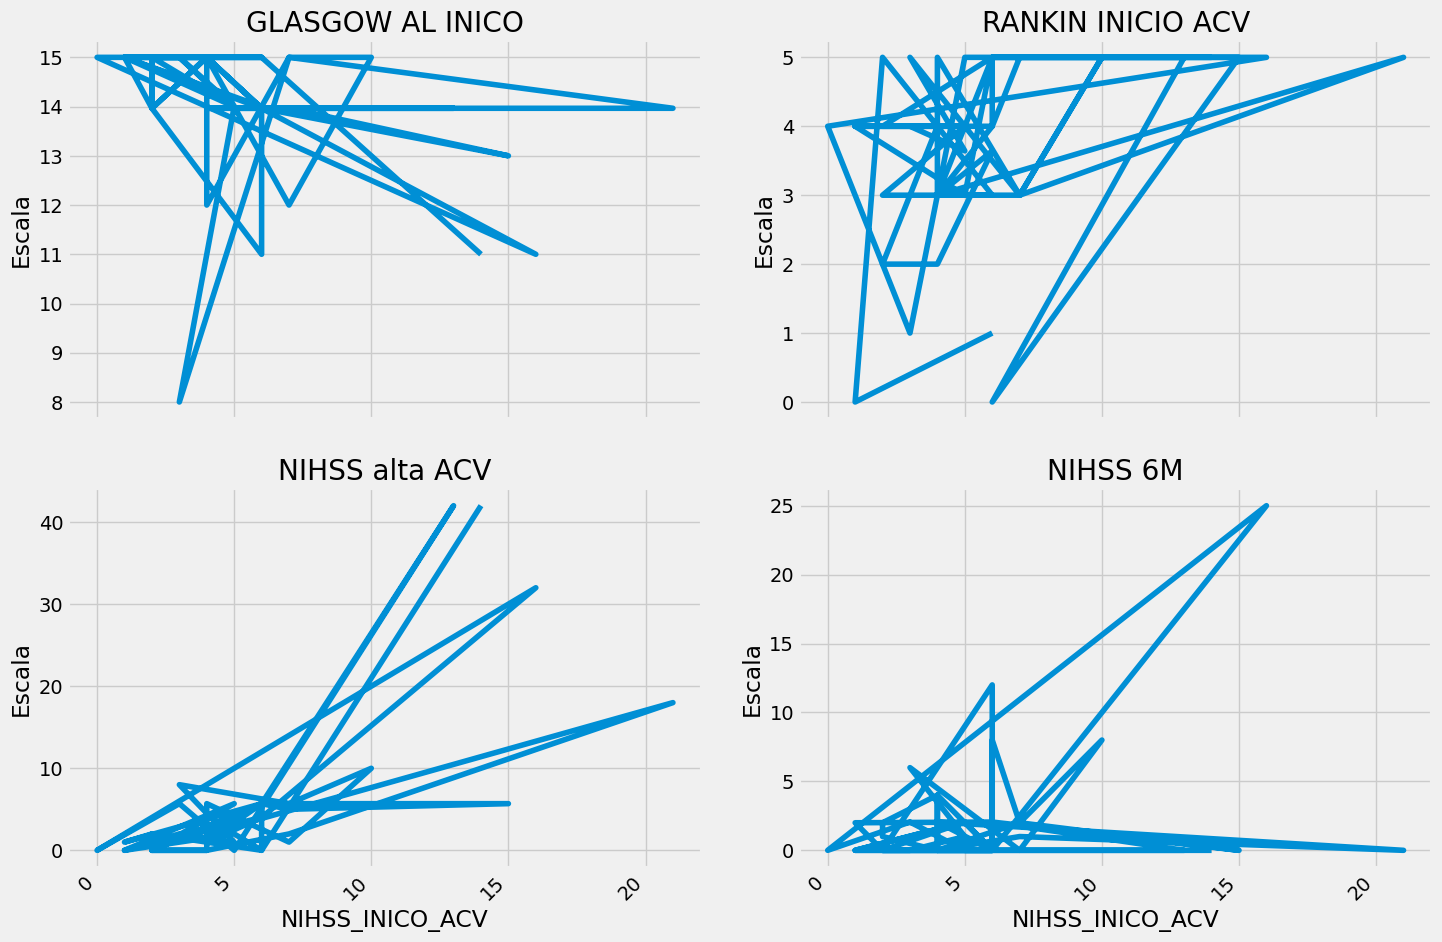

In [128]:
# Configurar el diseño de trazado
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (15,10))
fig.autofmt_xdate(rotation = 45)

# GLASGOW
ax1.plot(clase, dataset['GLASGOW AL INICO ACV'])
ax1.set_xlabel(''); ax1.set_ylabel('Escala'); ax1.set_title('GLASGOW AL INICO')

# RANKIN INICIO ACV
ax2.plot(clase, dataset['RANKIN INICIO ACV'])
ax2.set_xlabel(''); ax2.set_ylabel('Escala'); ax2.set_title('RANKIN INICIO ACV')

# NIHSS alta ACV
ax3.plot(clase, dataset['NIHSS alta ACV'])
ax3.set_xlabel('NIHSS_INICO_ACV'); ax3.set_ylabel('Escala'); 
ax3.set_title('NIHSS alta ACV')

# NIHSS 6M
ax4.plot(clase, dataset['NIHSS 6M'])
ax4.set_xlabel('NIHSS_INICO_ACV'); ax4.set_ylabel('Escala'); ax4.set_title('NIHSS 6M')

plt.tight_layout(pad=2)

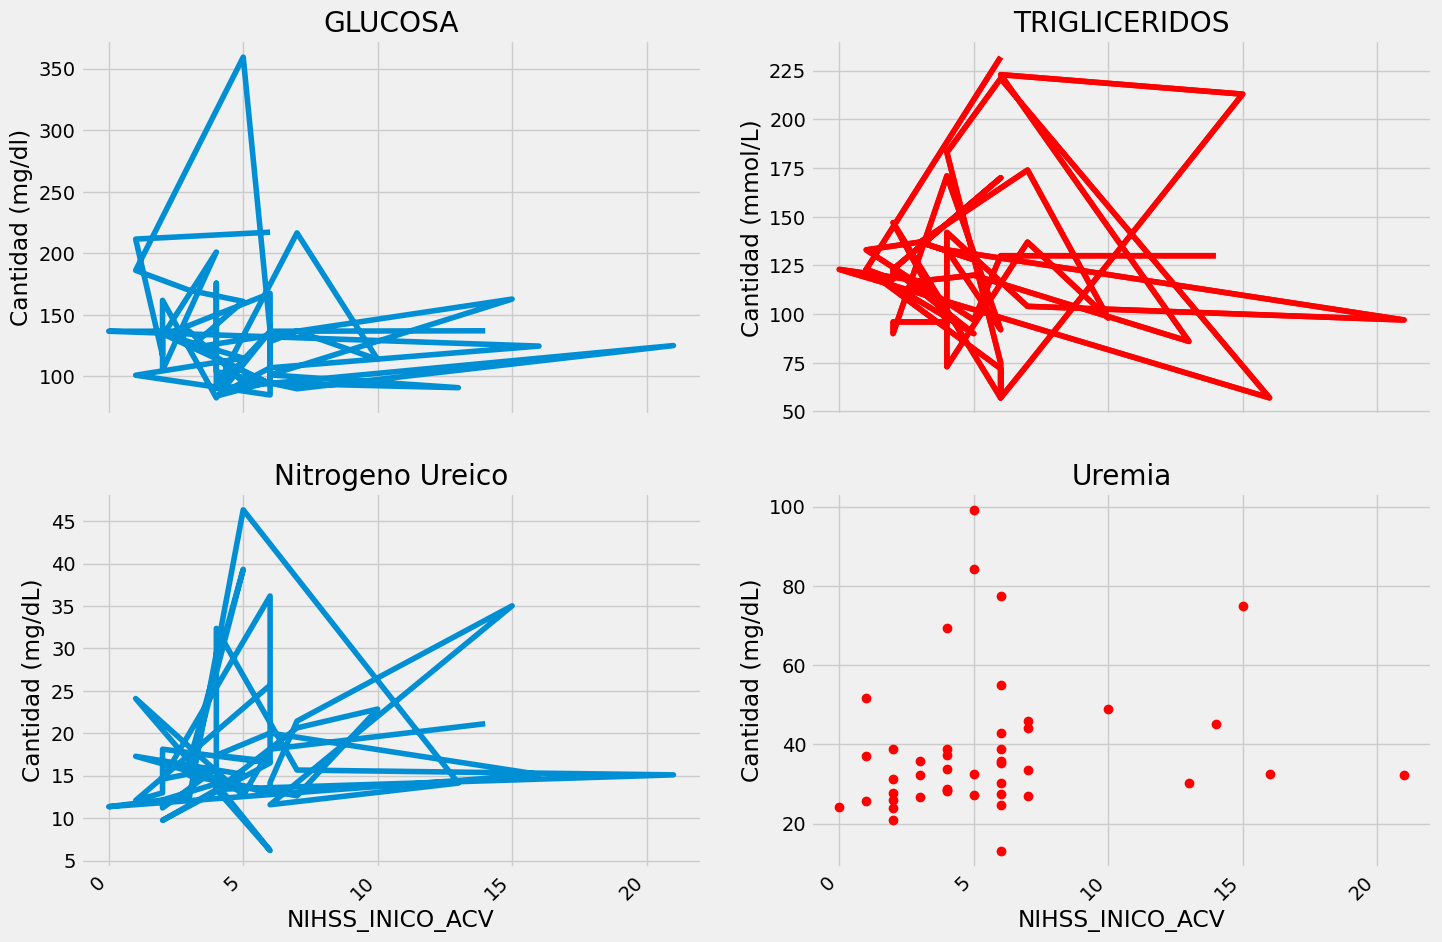

In [132]:
# Configurar el diseño de trazado
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (15,10))
fig.autofmt_xdate(rotation = 45)

# Glucosa
ax1.plot(clase, dataset['GLUCOSA'])
ax1.set_xlabel(''); ax1.set_ylabel('Cantidad (mg/dl)'); ax1.set_title('GLUCOSA')

# Trigliseridos
ax2.plot(clase, dataset['TRIGLICERIDOS'], 'r-')
ax2.set_xlabel(''); ax2.set_ylabel('Cantidad (mmol/L)'); ax2.set_title('TRIGLICERIDOS')

# NItrogeno
ax3.plot(clase, dataset['Nitrogeno Ureico'])
ax3.set_xlabel('NIHSS_INICO_ACV'); ax3.set_ylabel('Cantidad (mg/dL)'); ax3.set_title('Nitrogeno Ureico')

# Uremia
ax4.plot(clase, dataset['Uremia'], 'ro')
ax4.set_xlabel('NIHSS_INICO_ACV'); ax4.set_ylabel('Cantidad (mg/dL)'); ax4.set_title('Uremia')

plt.tight_layout(pad=2)

### Parcelas

C:\Users\Abraham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
C:\Users\Abraham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Abraham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
C:\Users\Abraham\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:

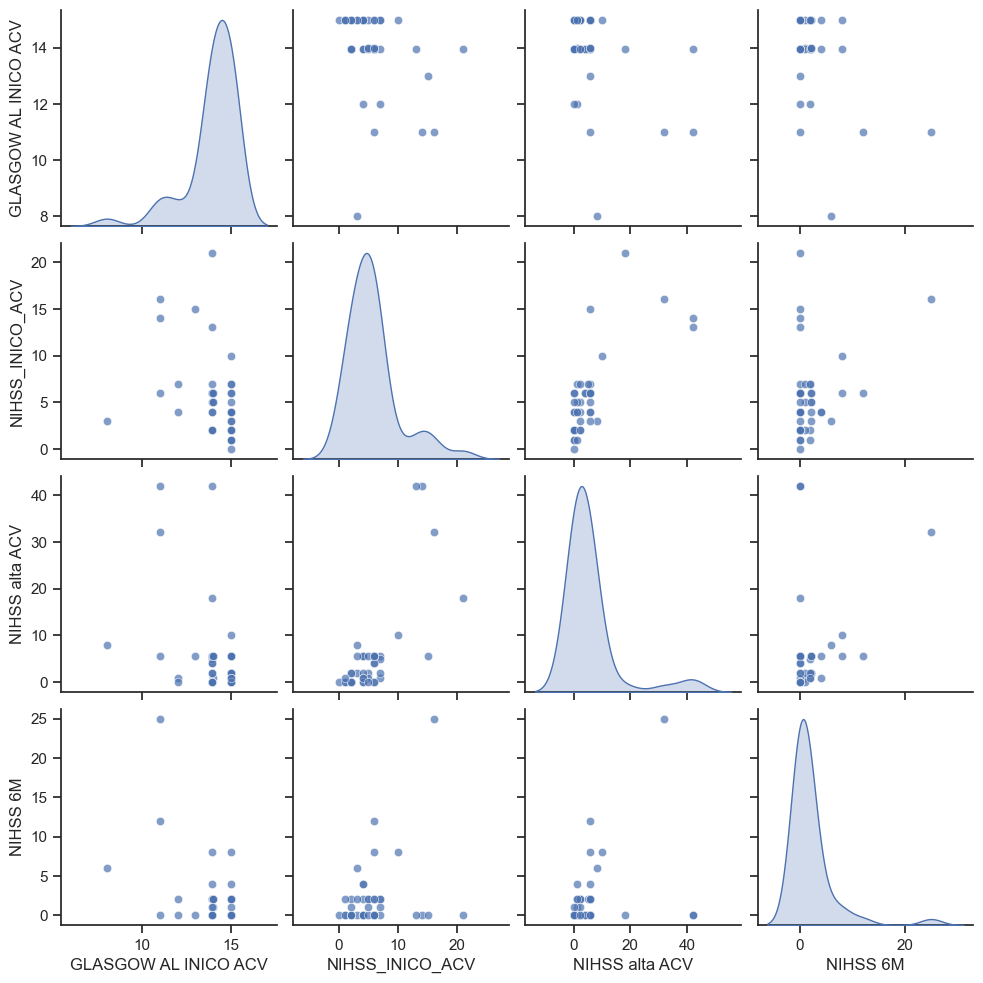

In [133]:
# Cree columnas de estaciones para emparejar colores de trazado
seasons = []

# Mosatramos solo algunos atributos
reduccion_dataset = dataset[['GLASGOW AL INICO ACV', 'NIHSS_INICO_ACV', 'NIHSS alta ACV', 'NIHSS 6M']]


# Usar seaborn para plots
import seaborn as sns
sns.set(style="ticks", color_codes=True);

# Create a custom color palete
palette = sns.xkcd_palette(['dark blue', 'dark green', 'gold', 'orange'])

# Make the pair plot with a some aesthetic changes
sns.pairplot(reduccion_dataset, diag_kind = 'kde', palette= palette, plot_kws=dict(alpha = 0.7),
                   diag_kws=dict(shade=True)); 

# 4-. Preparar los datos para el modelo de aprendizaje automático
## Preparación de datos

Los pasos exactos para la preparación de los datos dependerán del modelo utilizado y de los datos recopilados, pero se requerirá cierta cantidad de manipulación de datos para cualquier aplicación de aprendizaje automático.

##### Codificación One-Hot

El primer paso para nosotros se conoce como codificación one-hotde los datos Este proceso toma variables categóricas, como Diabetes, y las convierte en una representación numérica sin un orden arbitrario

In [154]:
# One Hot Encoding
dataset = pd.get_dummies(dataset)

dataset.head(5)

# Lista de características para uso posterior
features = dataset.drop('NIHSS_INICO_ACV', axis = 1)
feature_list = list(features.columns)

# 5-. Entrenar el modelo en los datos de entrenamiento

In [162]:
# Dividimos los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

# X son nuestras variables independientes
X = dataset.drop('NIHSS_INICO_ACV', axis = 1)

# y es nuestra variable dependiente
y = dataset['NIHSS_INICO_ACV']

# Uso de Skicit-learn para dividir datos en conjuntos de entrenamiento y prueba 
# División 75% de datos para entrenamiento, 25% de datos para test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

## Escalamos los Datos ?????

Nomalizamos lo datos, debe ser antes de la division de los datos


Escalador estándar. StandardScaler es el algoritmo de referencia de la industria. 🙂 StandardScaler estandariza una función restando la media y luego escalando a la varianza de la unidad. La varianza unitaria significa dividir todos los valores por la desviación estándar.

from sklearn.preprocessing import StandardScaler

sc =StandardScaler()
sc.fit(X)
X = sc.transform(X)

### Creamos el modelo y entrenamos

In [155]:
from sklearn import tree

# Creamos el modelo de Arbol de Decisión (y configuramos el número máximo de nodos-hoja)
dtc = tree.DecisionTreeClassifier(criterion = 'gini', splitter='best', random_state=0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

## Estructura del árbol creado

Profundidad del árbol: 10
Número de nodos terminales: 16


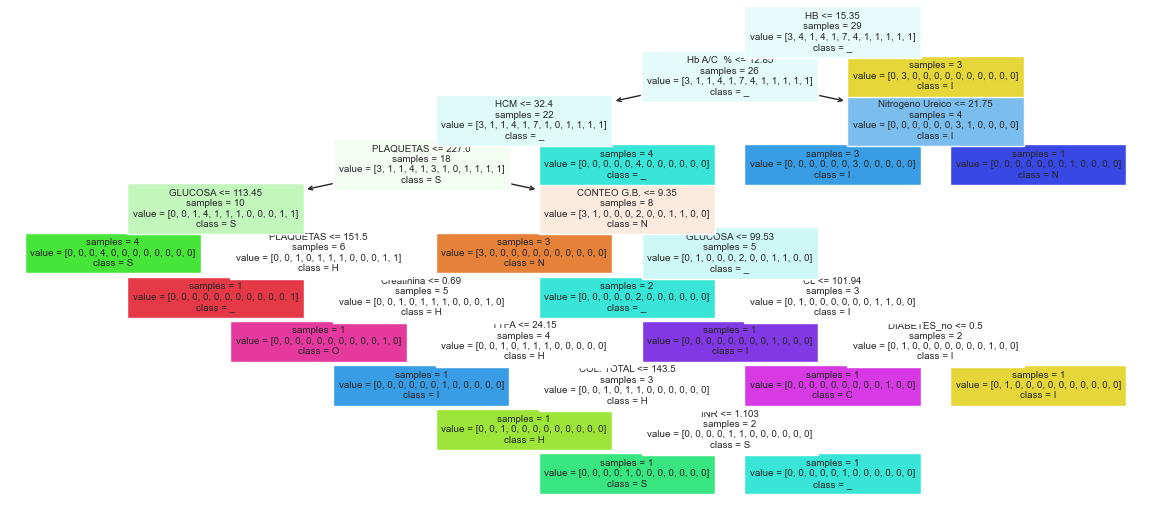

In [137]:
# Estructura del árbol creado
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(13, 6))

print(f"Profundidad del árbol: {dtc.get_depth()}")
print(f"Número de nodos terminales: {dtc.get_n_leaves()}")

plot = plot_tree(
            decision_tree = dtc,
            feature_names = feature_list,
            class_names   = 'NIHSS_INICO_ACV',
            filled        = True,
            impurity      = False,
            fontsize      = 7,
            ax            = ax
       )

# 6-. Predicciones sobre los datos de prueba
Se evalúa la capacidad predictiva del árbol inicial calculando el accuracy en el conjunto de test.

In [169]:
# Predicción Entrenamiento 
prediccionEntreno = dtc.predict(X_train)

# Predicción Tests
prediccionTests = dtc.predict(X_test)

### Generamos métricas para evaluar el modelo

## Fase de Entrenamiento

In [170]:
from sklearn import metrics

print("Entrenamiento - Accuracy :", metrics.accuracy_score(y_train, prediccionEntreno))

Entrenamiento - Accuracy : 1.0


### Matriz de Confusión

En el campo de la inteligencia artificial y en especial en el problema de la clasificación estadística, una matriz de confusión es una herramienta que permite la visualización del desempeño de un algoritmo que se emplea en aprendizaje supervisado.

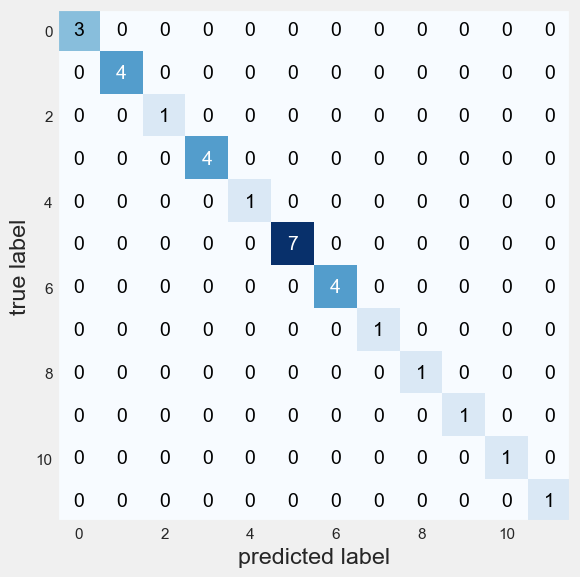

In [171]:
from matplotlib import pyplot as plot
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_train, prediccionEntreno)

plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)
plot.tight_layout()

In [158]:
print("Entrenamiento - Reporte de clasificación:\n", metrics.classification_report(y_train, prediccionEntreno))

Entrenamiento - Reporte de clasificación:
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         3
         2.0       1.00      1.00      1.00         4
         3.0       1.00      1.00      1.00         1
         4.0       1.00      1.00      1.00         4
         5.0       1.00      1.00      1.00         1
         6.0       1.00      1.00      1.00         7
         7.0       1.00      1.00      1.00         4
        10.0       1.00      1.00      1.00         1
        14.0       1.00      1.00      1.00         1
        15.0       1.00      1.00      1.00         1
        16.0       1.00      1.00      1.00         1
        21.0       1.00      1.00      1.00         1

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



# 7-. Comparar las predicciones con los objetivos conocidos del conjunto de pruebas y calcule las métricas de rendimiento
## Fase de validación  (Usando datos de Test)

In [165]:
print("Promedio - Accuracy :", metrics.accuracy_score(y_test, prediccionTests))

Promedio - Accuracy : 0.0


### Matriz de Confusión

C:\Users\Abraham\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:102: RuntimeWarning: invalid value encountered in divide
  normed_conf_mat = conf_mat.astype("float") / total_samples


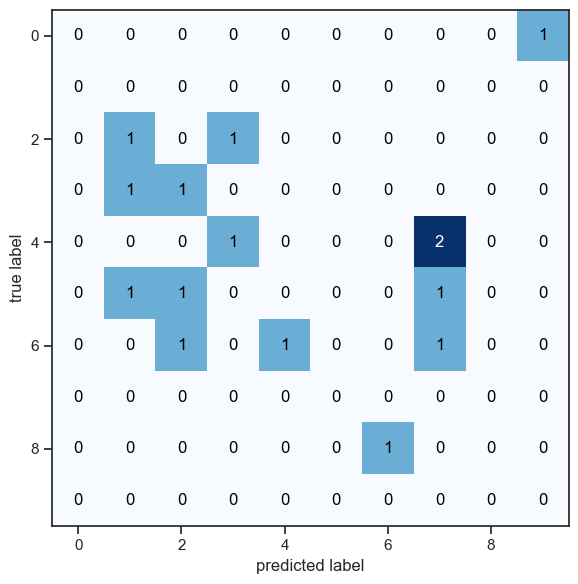

In [144]:
matriz = confusion_matrix(y_test, prediccionTests)

plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)
plt.tight_layout()

In [145]:
print("Entrenamiento - Reporte de clasificación:\n", metrics.classification_report(y_test, prediccionTests))

Entrenamiento - Reporte de clasificación:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       1.0
         1.0       0.00      0.00      0.00       0.0
         2.0       0.00      0.00      0.00       2.0
         3.0       0.00      0.00      0.00       2.0
         4.0       0.00      0.00      0.00       3.0
         5.0       0.00      0.00      0.00       3.0
         6.0       0.00      0.00      0.00       3.0
         7.0       0.00      0.00      0.00       0.0
        13.0       0.00      0.00      0.00       1.0
        15.0       0.00      0.00      0.00       0.0

    accuracy                           0.00      15.0
   macro avg       0.00      0.00      0.00      15.0
weighted avg       0.00      0.00      0.00      15.0



C:\Users\Abraham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Abraham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Abraham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, m

# 8-. Reducción de caracteristicas
Por experiencia previa y los gráficos producidos al principio, sabemos que algunas características no son útiles para nuestro problema de predicción. Para reducir la cantidad de funciones, lo que reducirá el tiempo de ejecución, con suerte sin reducir significativamente el rendimiento, podemos examinar la importancia de las funciones del Arbol de Decisión.

## Importancias de los predictores

La importancia de cada predictor en modelo se calcula como la reducción total (normalizada) en el criterio de división, en este caso el índice Gini, que consigue el predictor en las divisiones en las que participa. Si un predictor no ha sido seleccionado en ninguna divisón, no se ha incluido en el modelo y por lo tanto su importancia es 0.

In [160]:
importancia_predictores = pd.DataFrame(
                            {'Predictor': dataset.drop(columns = "NIHSS_INICO_ACV").columns,
                             'importancia': dtc.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,Predictor,importancia
5,GLUCOSA,0.175275
12,HB,0.114434
16,PLAQUETAS,0.114194
14,HCM,0.103813
6,Hb A/C %,0.097917
18,CONTEO G.B.,0.095604
20,Nitrogeno Ureico,0.059753
22,Creatinina,0.039835
27,CL,0.039835
17,INR,0.039835


#  9-. Interpretación el modelo y reporte los resultados visual y numéricamente

In [147]:
# Lista de características para uso posterior
features = dataset.drop('NIHSS_INICO_ACV', axis = 1)
feature_list = list(features.columns)

# Get numerical feature importances
importances = list(dtc.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: GLUCOSA              Importance: 0.18
Variable: HB                   Importance: 0.11
Variable: PLAQUETAS            Importance: 0.11
Variable: Hb A/C  %            Importance: 0.1
Variable: HCM                  Importance: 0.1
Variable: CONTEO G.B.          Importance: 0.1
Variable: Nitrogeno Ureico     Importance: 0.06
Variable: COL. TOTAL           Importance: 0.04
Variable: INR                  Importance: 0.04
Variable: Creatinina           Importance: 0.04
Variable: TTPA                 Importance: 0.04
Variable: CL                   Importance: 0.04
Variable: DIABETES_no          Importance: 0.04
Variable: EDAD                 Importance: 0.0
Variable: TRIGLICERIDOS        Importance: 0.0
Variable: PESO                 Importance: 0.0
Variable: TALLA                Importance: 0.0
Variable: FC                   Importance: 0.0
Variable: TRIGLICERIDOS        Importance: 0.0
Variable: LDL                  Importance: 0.0
Variable: HDL                  Importance: 0.0
Var

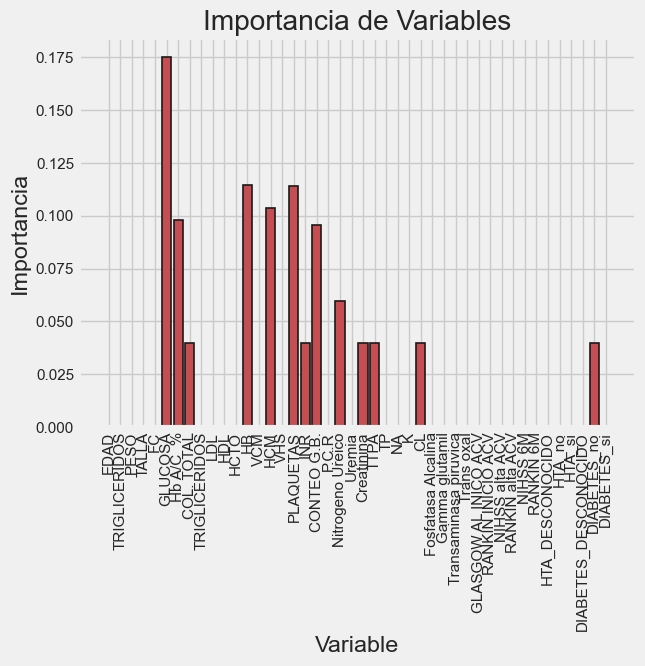

In [148]:
# Reset style 
plt.style.use('fivethirtyeight')

# lista de x ubicaciones para trazar
x_values = list(range(len(importances)))

# Gráfico de barras
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)

# Marque las etiquetas para el eje x
plt.xticks(x_values, feature_list, rotation='vertical')

# Etiquetas de eje y título
plt.ylabel('Importancia'); plt.xlabel('Variable'); plt.title('Importancia de Variables');

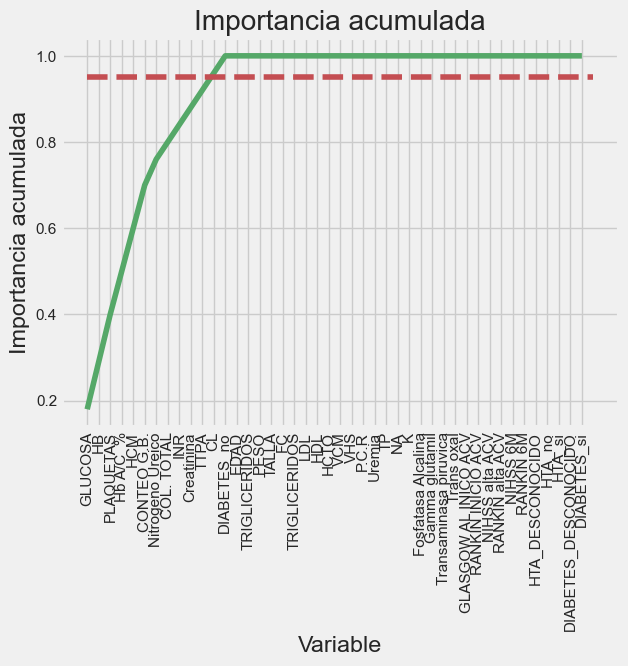

In [149]:
# Lista de funciones ordenadas de mayor a menor importancia
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

# Importancias acumulativas
cumulative_importances = np.cumsum(sorted_importances)

# Haz un gráfico de líneas
plt.plot(x_values, cumulative_importances, 'g-')

# Dibujar línea al 95% de importancia retenida
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

# Formato x ticks y etiquetas
plt.xticks(x_values, sorted_features, rotation = 'vertical')

# Etiquetas de eje y título
plt.xlabel('Variable'); plt.ylabel('Importancia acumulada'); plt.title('Importancia acumulada');

## Limite el número de características

Ahora reduciremos la cantidad de funciones en uso por el modelo a solo aquellas requeridas para representar el 95% de la importancia. Se debe usar el mismo número de características en los conjuntos de entrenamiento y prueba.

In [150]:
# Encuentre el número de características para una importancia acumulada del 95%
# Agregue 1 porque Python está indexado a cero
print('Número de columna para el 95 % de importancia:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Número de columna para el 95 % de importancia: 12
